# <u>Computation on Arrays: Broadcasting</u>

## Introducing Broadcasting

In [1]:
import numpy as np

In [4]:
# For arrays of the same the same size, binary opeations are performed on an element by element basis

a = np.array([0, 1, 2])
b = np.array([3, 4, 5])

a+b

array([3, 5, 7])

In [5]:
# we can just as easily add a scalar (think of it as a zero-dimensional array) to an array

a + 5

array([5, 6, 7])

In [6]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [7]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [8]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


## Rules of Broadcasting

### Broadcasting Example 1

In [12]:
M = np.ones((2, 3))
a = np.arange(3)
M

array([[1., 1., 1.],
       [1., 1., 1.]])

In [11]:
a

array([0, 1, 2])

In [13]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting Example 2

In [14]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [15]:
a

array([[0],
       [1],
       [2]])

In [16]:
b

array([0, 1, 2])

In [17]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting Example 3

In [18]:
M = np.ones((3, 2))
a = np.arange(3)

In [19]:
a + M

ValueError: operands could not be broadcast together with shapes (3,) (3,2) 

In [23]:
a[:, np.newaxis].shape

(3, 1)

In [22]:
# For example, here is the logaddexp(a, b) function, which computes log(exp(a) + exp(b)) with more precision than the naive approach

np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

In [26]:
a.shape

(3,)

## Broadcasting in Practice

### Centering an Array

In [44]:
rng = np.random.default_rng(seed=1701)
X = rng.random((10, 3))

In [45]:
# We can compute the mean of each column using the mean aggregate across the first dimension
Xmean = X.mean(0)

In [46]:
Xmean

array([0.38503638, 0.36991443, 0.63896043])

In [47]:
Xmean.shape

(3,)

In [48]:
X_centered = X - Xmean

In [50]:
# To double-check that we’ve done this correctly, we can check that the centered array has a mean near zero

X_centered.mean(0)

array([ 4.99600361e-17, -4.44089210e-17,  0.00000000e+00])

### Plotting a Two-Dimensional Function

In [61]:
# x and y have 500 steps from 0 to 5 
x = np.linspace(0, 5, 500)
y = np.linspace(0, 5, 500)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

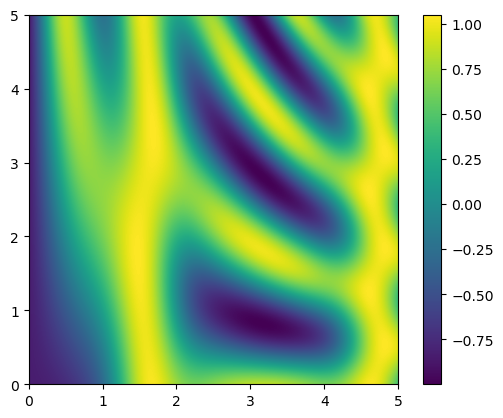

In [67]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5])
plt.colorbar();